In [2]:
#Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv("/Users/carolinewang/Desktop/diabetes.csv")
diabetes_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
##RESEARCH QUESTION:##
# What are the effects of Insulin and Age on DiabetesPedigreeFunction?

In [4]:
##Data Cleaning##
#Delete rows that contain Insulin = 0 or DiabetesPedigreeFunction = 0.
diabetes_data = diabetes_data.loc[~(diabetes_data['Insulin'] == 0)]
diabetes_data = diabetes_data.loc[~(diabetes_data['DiabetesPedigreeFunction'] == 0)]
diabetes_data
#After data cleaning, the number of rows dropped from 768 to 394

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
13                      0.398   59        1  
..                        ...  ...      ...  
753                     0.222   26        1  
755                     1.057   37        1  
760                     0.766   22        0  
763                     0.171   63        0  
765                     0.245   30        0  

[394 rows x 9 columns]

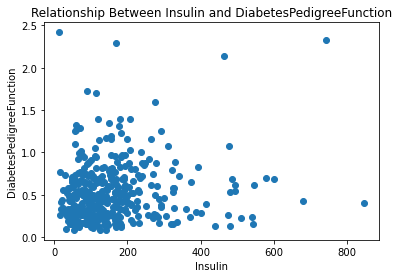

In [5]:
##Visualization##
X = diabetes_data.Insulin
Y = diabetes_data.Age
Z = diabetes_data.DiabetesPedigreeFunction
#Use scatter plot to show the relationships between Insulin and DiabetesPedigreeFunction
#Scatter Plot 1
plt.title('Relationship Between Insulin and DiabetesPedigreeFunction')
plt.xlabel('Insulin')
plt.ylabel('DiabetesPedigreeFunction')
plt.scatter(X,Z)

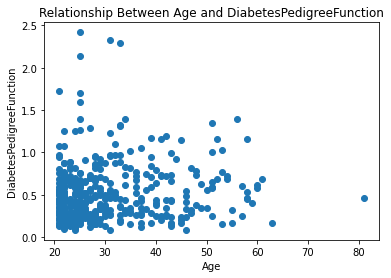

In [6]:
#Use scatter plot to show the relationships between Age and DiabetesPedigreeFunction
#Scatter Plot 2
plt.title('Relationship Between Age and DiabetesPedigreeFunction')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.scatter(Y,Z)

In [7]:
##T-test##

#Set alpha = 0.05
#H0: The Mean of DiabetesPedigreeFunction for Youth and Adults are the same.
#H1: The Mean of DiabetesPedigreeFunction for Youth and Adults are different.

#Change Age from CONTINUOUS VARIABLE to CATEGORICAL VARIABLE:
#AGE                         CATEGORY
#0-14                        Children
#15-24                       Youth
#25-64                       Adults
#65-81(since max(Age)=81)    Seniors
Age_Category = pd.cut(diabetes_data.Age, bins = [0,14,24,64,81], labels = ['Children','Youth','Adults','Seniors'])
#Insert a new column Age Group next to Age
diabetes_data.insert(8,"Age Group",Age_Category)
import scipy.stats as stats
DPF_Youth = diabetes_data.loc[diabetes_data['Age Group'] == 'Youth', 'DiabetesPedigreeFunction'].to_numpy()
DPF_Adults = diabetes_data.loc[diabetes_data['Age Group'] == 'Adults', 'DiabetesPedigreeFunction'].to_numpy()
t_value, p_value = stats.ttest_ind(DPF_Youth, DPF_Adults)
t_value, p_value
#t = -2.599554792720077, p = 0.009687895705255732
#Since p value is less then alpha, we cannot reject the null hyphothesis.
#Thus, the mean of DiabetesPedigree for Youth and Adults are the same.

(-2.599554792720077, 0.009687895705255732)

In [8]:
##Multiple Linear Regression##

#Set x and y
X1 = diabetes_data[['Insulin','Age']]
Y1 = diabetes_data['DiabetesPedigreeFunction']
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 100)
#Fitting the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
#Intercept and Coefficient
print("Intercept:", mlr.intercept_)
print("Coefficients:", list(zip(X1,mlr.coef_)))
#As obtained, Intercept = 0.429
#Coefficient(Insulin) = 0.00046
#Coefficient(Age) = 0.00066
#Thus, the equation is: DiabetesPedigreeFunction = 0.429 + (0.00046*Insulin) + (0.00066*Age) + e

Intercept: 0.42949929775187945
Coefficients: [('Insulin', 0.0004571763504408529), ('Age', 0.0006607400913644675)]


In [9]:
##ANOVA##
#Use Two-way ANOVA to determine whether Insulin and Age have a significant effect on DiabetesPedigreeFunction,
#and to determine whether there is any interaction effect between Insulin and Age.

import statsmodels.api as sm
from statsmodels.formula.api import ols

#Perform two-way ANOVA
model = ols('DiabetesPedigreeFunction ~ Insulin + Age + Insulin:Age', data = diabetes_data).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df         F    PR(>F)
Insulin       0.652521    1.0  5.419497  0.020424
Age           0.116118    1.0  0.964418  0.326685
Insulin:Age   0.285179    1.0  2.368551  0.124613
Residual     46.956977  390.0       NaN       NaN

In [19]:
##Post-hoc Test##
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(diabetes_data['DiabetesPedigreeFunction'], diabetes_data['Insulin'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

<class 'statsmodels.iolib.table.SimpleTable'>